In [1]:
import pandas as pd
my_data = pd.read_csv("../clean/coffeeCleaned.csv")
my_data

,coffee_type,rating,reviews,price
0,classic roast,3.8,93,13.92
1,"espresso,dark roast",4.7,914,3.76
2,"medium roast,classic roast",4.4,740,9.97
3,classic roast,4.7,1598,9.98
4,classic roast,4.2,263,7.98
...,...,...,...,...
1009,"espresso,espresso roast",4.0,4,17.97
1010,dark roast,0.0,0,12.30
1011,"espresso,dark roast",0.0,0,10.99
1012,"arabica,dark roast",4.3,5036,12.98


<font size = "3">
Data is way too sparse. Each coffee product is riddled with various descriptions and this will make statistical analysis and machine learning classification essentially impossible. Therefore, data unfication is in order.
</font>

In [2]:
type_list = list(my_data["coffee_type"])
for _ in type_list[:10]:
    print(" - ", _)
print("-" * 20)
print("Example for unification:\n")
print("<{}> will simply become <{}>".format(type_list[1], "dark roast"))

 -  classic roast
 -  espresso,dark roast
 -  medium roast,classic roast
 -  classic roast
 -  classic roast
 -  espresso,dark roast
 -  black rifle coffee,dark roast
 -  medium roast,black rifle coffee
 -  black silk ground coffee,dark roast
 -  black silk ground coffee,dark roast
--------------------
Example for unification:

<espresso,dark roast> will simply become <dark roast>


In [3]:
def unify_it():
    for i, j in enumerate(type_list):
        if "light" in j:
            type_list[i] = "light roast"
        elif "medium" in j:
            type_list[i] = "medium roast"
        elif "dark" in j:
            type_list[i] = "dark roast"
        elif "classic" in j:
            type_list[i] = "classic roast"
    return type_list
unify_it()
print(type_list[:10])
print("There are still {} unique coffee types.".format(len(set(type_list))), end =" ")

['classic roast', 'dark roast', 'medium roast', 'classic roast', 'classic roast', 'dark roast', 'dark roast', 'medium roast', 'dark roast', 'dark roast']
There are still 42 unique coffee types. 

In [4]:
def reformat():
    my_data.drop(columns="coffee_type", inplace=True)
    my_data["coffee_type"] = type_list
    return my_data
reformat()

,rating,reviews,price,coffee_type
0,3.8,93,13.92,classic roast
1,4.7,914,3.76,dark roast
2,4.4,740,9.97,medium roast
3,4.7,1598,9.98,classic roast
4,4.2,263,7.98,classic roast
...,...,...,...,...
1009,4.0,4,17.97,"espresso,espresso roast"
1010,0.0,0,12.30,dark roast
1011,0.0,0,10.99,dark roast
1012,4.3,5036,12.98,dark roast


In [5]:
def target_only():
    x = my_data[my_data["coffee_type"] == "light roast"].index
    y = my_data[my_data["coffee_type"] == "medium roast"].index
    z = my_data[my_data["coffee_type"] == "dark roast"].index
    omega =  pd.concat([my_data.iloc[x], my_data.iloc[y], my_data.iloc[z]], axis=0)
    omega.reset_index(drop = True, inplace = True)
    return omega
target_types = target_only()
target_types

,rating,reviews,price,coffee_type
0,3.8,5,12.98,light roast
1,4.6,64,4.94,light roast
2,4.7,740,14.92,light roast
3,4.7,336,9.96,light roast
4,4.5,1924,26.72,light roast
...,...,...,...,...
818,4.7,98,10.64,dark roast
819,0.0,0,15.11,dark roast
820,0.0,0,12.30,dark roast
821,0.0,0,10.99,dark roast


In [6]:
target_types.to_csv("./coffeeProcessed.csv", index = False)

# Pre-process for statistical analysis
<font size = "3">
Rows with coffee types with either of "light, medium, or dark" variants will be chosen. Then, for each type, and for each numerical column the average will be calculated & used for plotting.
</font>

In [6]:
def target_only():
    x = my_data[my_data["coffee_type"] == "light roast"].index
    y = my_data[my_data["coffee_type"] == "medium roast"].index
    z = my_data[my_data["coffee_type"] == "dark roast"].index
    discrete_df = [my_data.iloc[x], my_data.iloc[y], my_data.iloc[z]]
    totals = []
    for i in discrete_df:
        temp = []
        temp.append(i.sum(numeric_only = True))
        totals.append(temp)
    print("light: ", len(x))
    print("medium: ", len(y))
    print("dark: ", len(z))
    return totals
total_list = target_only()
print(total_list)


light:  68
medium:  514
dark:  241
[[rating       247.70
reviews    38537.00
price       1189.34
dtype: float64], [rating       2232.40
reviews    279073.00
price        7179.94
dtype: float64], [rating       1046.50
reviews    105120.00
price        2975.65
dtype: float64]]


# Create 2 dataframes for basic plotting
<font size = "3">
I will create two dataframes both of which will feature only three rows:<br>
1 - The sum of each numerical column for each coffee type<br>
2 - The average of each numerical column for each coffee type
</font>

In [9]:
from numpy import average


def create_df():
    total_sum = []
    total_average = []
    type_length = [68, 514, 241]
    for i in range(3):
        temp = []
        temp_average = []
        for j in range(3):
            temp.append(total_list[i][0][j])
            temp_average.append(total_list[i][0][j] / type_length[i])
        total_sum.append(temp)
        total_average.append(temp_average)
    sum_df = pd.DataFrame(total_sum, columns = ["rating", "reviews", "price"],
            index = ["Light roast", "Medium roast", "Dark roast"])
    average_df = pd.DataFrame(total_average, columns = ["rating", "reviews", "price"],
            index = ["Light roast", "Medium roast", "Dark roast"])
    return (sum_df, average_df)
data = create_df()
print("Two dataframes have been created:\n - data[0]\n - data[1]")
print("Data[0] shows the total sum of the columns for each coffee type", end = " ")
print("and data[1] show the average of the columns for each coffee type.")
data

Two dataframes have been created:
 - data[0]
 - data[1]
Data[0] shows the total sum of the columns for each coffee type and data[1] show the average of the columns for each coffee type.


(              rating   reviews    price
 Light roast    247.7   38537.0  1189.34
 Medium roast  2232.4  279073.0  7179.94
 Dark roast    1046.5  105120.0  2975.65,
                 rating     reviews      price
 Light roast   3.642647  566.720588  17.490294
 Medium roast  4.343191  542.943580  13.968755
 Dark roast    4.342324  436.182573  12.347095)

# Basic statistics
<font size = "3">
The following two diagrams show the price, rating, and number of reviews for each coffee type.  
</font>

(<AxesSubplot: >, <AxesSubplot: >)

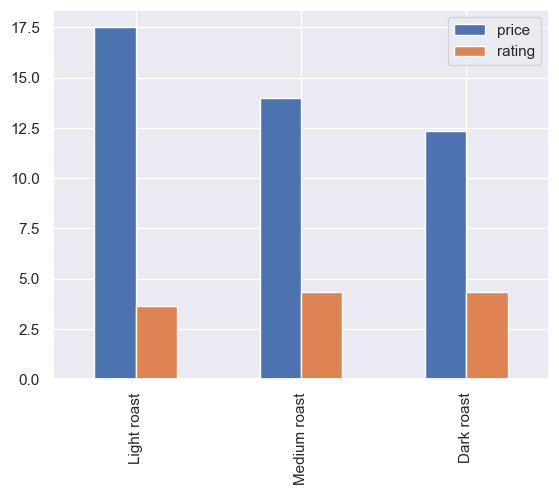

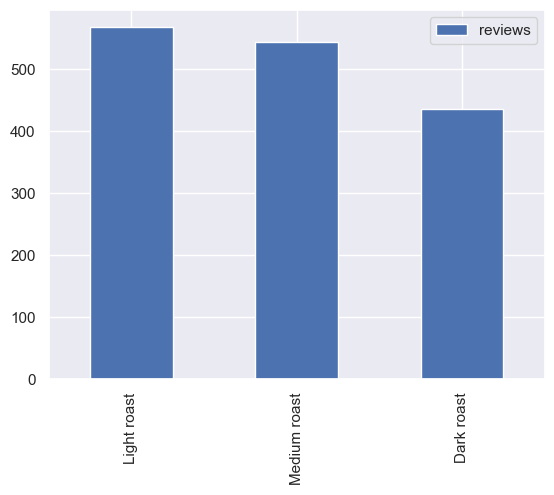

In [ ]:
data[1].plot(y = ["price", "rating"], kind = "bar"), data[1].plot(y = ["reviews"], kind = "bar")